# **Micro Credit Defaulter Project**

By: **Harsh Nema**

**Problem Statement:**

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on.

Many microfinance institutions (MFI), experts and donorsare supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFShas been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour.

They arecollaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be6(in Indonesian Rupiah), while, for the loan amount of 10(in Indonesian Rupiah), the payback amount should be 12(in Indonesian Rupiah). 

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data file.csv to Data file.csv


In [ ]:
# Importing Flight price prediction dataset csv file
import io
df = pd.read_csv(io.BytesIO(uploaded['Data file.csv']))

In [ ]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [ ]:
print('No. of Rows in the dataset :',df.shape[0])
print('No. of Columns in the dataset :',df.shape[1])

No. of Rows in the dataset : 209593
No. of Columns in the dataset : 37


In [ ]:
df.isin([' ','?','-','null','NA']).sum().any()

False

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
# lets sort columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90'], float64: ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'], object: ['msisdn', 'pcircle', 'pdate']}

- **label** : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
- **msisdn** : mobile number of user
- **aon** : age on cellular network in days
- **daily_decr30** : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- **daily_decr90** : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- **rental30** : Average main account balance over last 30 days
- **rental90** : Average main account balance over last 90 days
- **last_rech_date_ma** : Number of days till last recharge of main account
- **last_rech_date_da**: Number of days till last recharge of data account
- **last_rech_amt_ma** : Amount of last recharge of main account (in Indonesian Rupiah)
- **cnt_ma_rech30** : Number of times main account got recharged in last 30 days
- **fr_ma_rech30** : Frequency of main account recharged in last 30 days
- **sumamnt_ma_rech30** : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- **medianamnt_ma_rech30** : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- **medianmarechprebal30** : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- **cnt_ma_rech90** : Number of times main account got recharged in last 90 days
- **fr_ma_rech90** : Frequency of main account recharged in last 90 days
- **sumamnt_ma_rech90** : Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- **medianamnt_ma_rech90** : Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- **medianmarechprebal90** : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- **cnt_da_rech30** : Number of times data account got recharged in last 30 days
- **fr_da_rech30**: Frequency of data account recharged in last 30 days
- **cnt_da_rech90** : Number of times data account got recharged in last 90 days
- **fr_da_rech90** : Frequency of data account recharged in last 90 days
- **cnt_loans30** : Number of loans taken by user in last 30 days
- **amnt_loans30** : Total amount of loans taken by user in last 30 days
- **maxamnt_loans30** : maximum amount of loan taken by the user in last 30 days
- **medianamnt_loans30** : Median of amounts of loan taken by the user in last 30 days
- **cnt_loans90** : Number of loans taken by user in last 90 days
- **amnt_loans90** : Total amount of loans taken by user in last 90 days
- **maxamnt_loans90** : maximum amount of loan taken by the user in last 90 days
- **medianamnt_loans90** : Median of amounts of loan taken by the user in last 90 days
- **payback30** : Average payback time in days over last 30 days
- **payback90** : Average payback time in days over last 90 days
- **pcircle** : telecom circle
- **pdate** : date

In [ ]:
df.duplicated('msisdn').sum()

23350

In [ ]:
df.duplicated().sum()

1

* There 23350 rows with duplicate mobile number

* For 23350 entry it can possible that same mobile number is switch to other customer and another observation is for these duplicate entries features values are different

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


In [ ]:
# 999860/365 = 2739; Max values is 999860days which means 2739.34 year which is not possible at all

df[df['aon']>7300].value_counts().sum() # Assuming a customer stay at one network for max 20 years(1st assumption)

2089

In [ ]:
df[df['aon']<0].value_counts().sum()

1539

* **aon** - age on cellular network in days, has greater standard deviation than mean value, this indicates some inappropriate values in this column

* There is a large difference in the **aon** 75% and maximum values which indicates the presence of outliers in the given column

* Minimum value in negative also indicates something unrealistic value in the column, there are 1539 entries for 'aon' with value less than 0

* We know that maximum loan amount taken by customers can be 0,5,10 and which can be repay with amount of 0,6,12. We gone replace values greater than 12 into category of zero, making **assumption** here that loan amount greater than 12 to be replace with zero

* There are lot of features which have negative values and higher max value compare to 75 percentile.There is need of some kind common Strategy to handle them based on certain assumption

 



# Strategy to handle data error in min and max column

* **Assumption-** All negative values are assumed as a typing error happened accidentally by typing '-' in front of original value (except feature depicting median)
  * Negative values are converted into absolute value to correct    negative typing error whenever applicable except feature depicting median
  * Upper limit of these features handle by outlier removal

  * The median of main account balance for **'medianmarechprebal90'** can be negative

  * There are no information about any restrictions on the number of times a customer can avail loans. Hence these extreme values can be considered as realistic for **'cnt_loans30' and 'cnt_loans90'**

In [ ]:
#Converting all negative values to positive values in above columns
df['aon']=abs(df['aon'])
df['daily_decr30']=abs(df['daily_decr30'])
df['daily_decr90']=abs(df['daily_decr90'])
df['rental30']=abs(df['rental30'])
df['rental90']=abs(df['rental90'])
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['last_rech_date_da']=abs(df['last_rech_date_da'])

In [ ]:
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0)
       & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']=0.0

In [ ]:
df['maxamnt_loans30'].value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

In [ ]:
# Saving error free data to new CSV file with name Clean Data file
from google.colab import files
df.to_csv('Clean Data file.csv',index=False, encoding = 'utf-8-sig') 
files.download('Clean Data file.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Importing Clean Data file**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Clean Data file.csv to Clean Data file.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Clean Data file.csv']))

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.0,1.000000,1.000000,1.00,1.000000
aon,209593.0,8112.808718,75696.032666,1.0,246.000000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.431293,9220.606472,0.0,42.453000,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.544140,10918.796572,0.0,42.693333,1500.000000,7802.79,320630.000000
rental30,209593.0,2715.376558,4294.257439,0.0,299.700000,1095.750000,3362.35,198926.110000
rental90,209593.0,3509.497148,5754.630600,0.0,330.000000,1347.220000,4204.51,200148.110000
last_rech_date_ma,209593.0,3756.125844,53905.872857,0.0,1.000000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.204801,53374.833299,0.0,0.000000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.0,770.000000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.0,1.000000,3.000000,5.00,203.000000


In [ ]:
df['pdate'] = pd.to_datetime(df['pdate'])
df['pday'] = df['pdate'].dt.day
df['pmonth'] = df['pdate'].dt.month
df['pyear'] = df['pdate'].dt.year

In [ ]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,pday,pmonth
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20,20,7
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10,10,8
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19,19,8
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22,22,6


In [ ]:
df['pyear'].value_counts()

2016    209593
Name: pyear, dtype: int64

'pyear' has only single value of 2016 and hence this column can be dropped

In [ ]:
df.drop('pyear',axis=1,inplace=True)

**Exploratory Data Analysis**

In [ ]:
df['pdate'].describe()

count                  209593
unique                     82
top       2016-07-04 00:00:00
freq                     3150
first     2016-06-01 00:00:00
last      2016-08-21 00:00:00
Name: pdate, dtype: object

*This indicates that the data was from* **1st June 2016 to 21st Aug 2016**

In [ ]:
for i in df:
    print(i)
    print(df[i].value_counts())
    print("="*150)

label
1    183431
0     26162
Name: label, dtype: int64
msisdn
04581I85330    7
47819I90840    7
30080I90588    6
55809I89238    6
22038I88658    6
              ..
36902I90840    1
17447I88689    1
59686I90584    1
00504I91190    1
65061I85339    1
Name: msisdn, Length: 186243, dtype: int64
aon
95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
977092.351997      1
645851.038396      1
881623.815396      1
555267.797667      1
811881.372822      1
Name: aon, Length: 4499, dtype: int64
daily_decr30
0.000000        4144
500.000000       829
1000.000000      569
700.000000       381
600.000000       354
                ... 
3185.960000        1
2044.981667        1
18117.584000       1
13120.291667       1
4489.362000        1
Name: daily_decr30, Length: 146597, dtype: int64
daily_decr90
0.000000        4063
500.000000       781
1000.000000      490
700.000000       343
600.000000       316
                ... 
24

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import warnings # Filtering warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import plotly.graph_objs as go
import plotly.offline as py

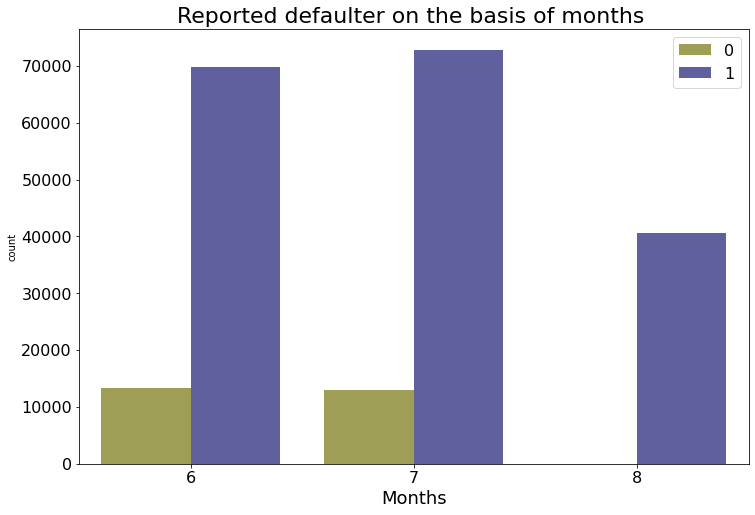

In [ ]:
plt.figure(figsize=(12,8))
p = sns.countplot(df['pmonth'], hue=df['label'], palette='gist_stern_r')
plt.title('Reported defaulter on the basis of months ', fontsize=22)
p.set_xlabel('Months',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

**June and July observed almost equal number of defaulters but first 20days of August didn't observe any defaulter**

In [ ]:
count = ['maxamnt_loans90','maxamnt_loans30']

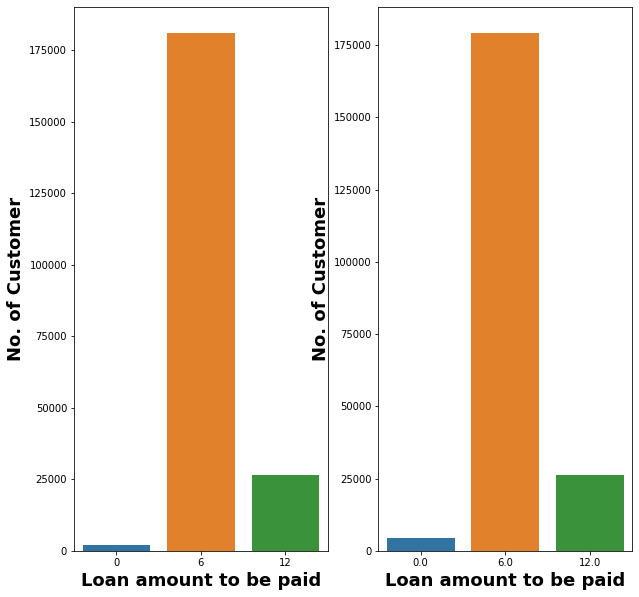

In [ ]:
plt.figure(figsize=(10,10))
plot=1
for i in count:
  if plot<=2:
    plt.subplot(1,2,plot)
    sns.countplot(df[i])
    plt.xlabel('Loan amount to be paid',fontsize=18,fontweight ='bold')
    plt.ylabel('No. of Customer',fontsize=18,fontweight ='bold')
  plot+=1
plt.show()

* In last 30 days, 179192 people had taken 6Rs as the loan amount whereas the number of people who had not taken loan are 4291

* In last 90 days, 180944 people had taken 6Rs as the loan amount and the number of people is  whereas the number of people who had not taken loan are 2043

* 26605 people had taken 12Rs as the loan amount within 90 days and 26109 people had taken 12Rs as the loan amount for 30 days

* **This means customer mostly opt for 6 Rs Loan**

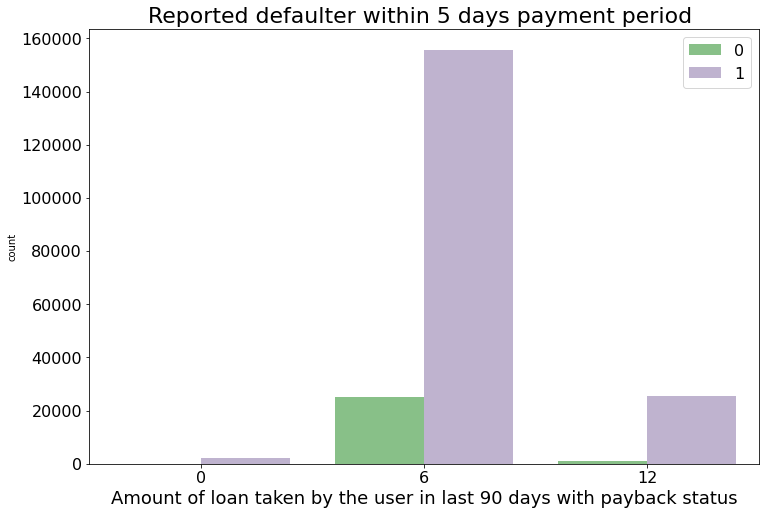

In [ ]:
plt.figure(figsize=(12,8))
p = sns.countplot(df['maxamnt_loans90'], hue=df['label'], palette='Accent')
plt.title('Reported defaulter within 5 days payment period ', fontsize=22)
p.set_xlabel('Amount of loan taken by the user in last 90 days with payback status',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

*Very few defaulter in customers who take loan in amount of 12*

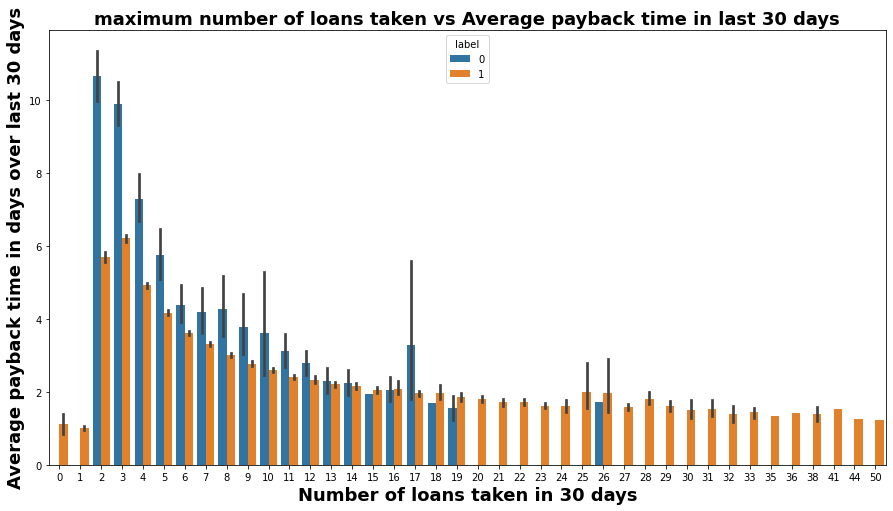

In [ ]:
#Checking the maximum number of loans taken vs Amount payed within due dates by people or not on the basis of label
plt.figure(figsize=(15,8))
sns.barplot(x="cnt_loans30",y='payback30',hue='label', data=df)
plt.title('maximum number of loans taken vs Average payback time in last 30 days',fontsize=18,fontweight ='bold')
plt.xlabel('Number of loans taken in 30 days',fontsize=18,fontweight ='bold')
plt.ylabel('Average payback time in days over last 30 days',fontsize=18,fontweight ='bold')
plt.show()

In [ ]:
num = ['last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90',
       'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90','aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30',
       'cnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']

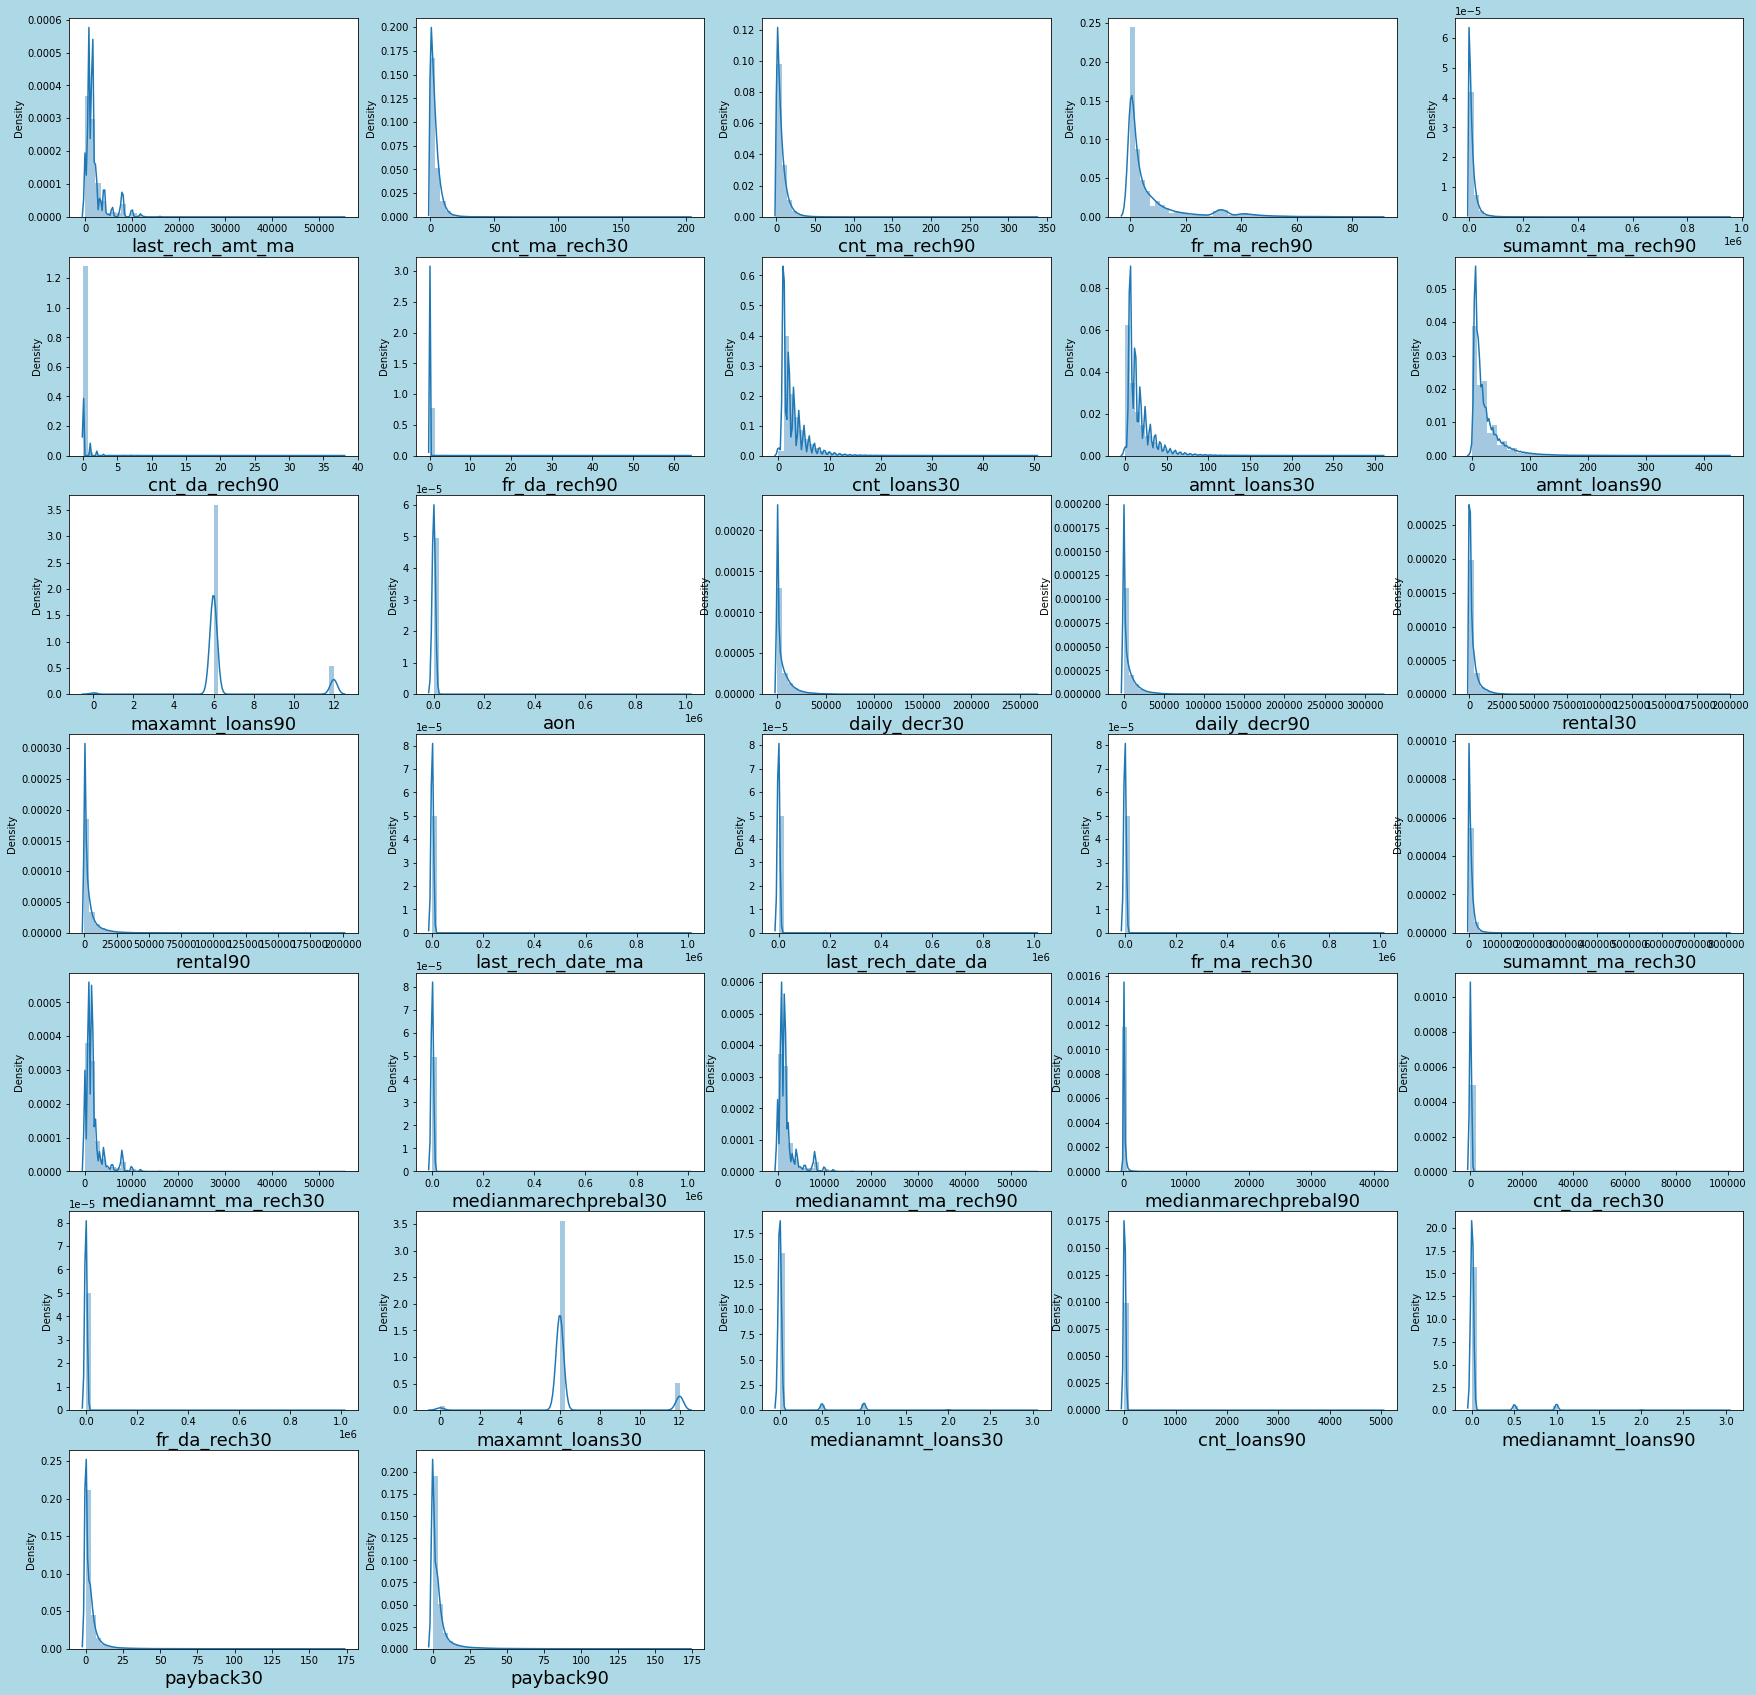

In [ ]:
plt.figure(figsize=(30,30),facecolor='lightblue')
plotnumber=1
for column in num:
    if plotnumber<=35:
        ax = plt.subplot(7,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.show()

**The data distribution of most of the features are positively skewed**

In [ ]:
df.skew()

label                   -2.270254
aon                     10.392951
daily_decr30             3.946246
daily_decr90             4.252578
rental30                 4.560510
rental90                 4.467282
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30          1.241879
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

# **Feature Engineering**

In [ ]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [ ]:
#Droping PCircle and msisdn column as they are unnecessary for further investigation
df.drop(['msisdn', 'pcircle'],axis=1,inplace=True)

In [ ]:
df.drop('pdate',axis=1,inplace=True)

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90', 'pday', 'pmonth'], float64: ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']}

**As no variable with object datatype is present in database no need for any kind of encoding**

# **Outlier Detection and removal**

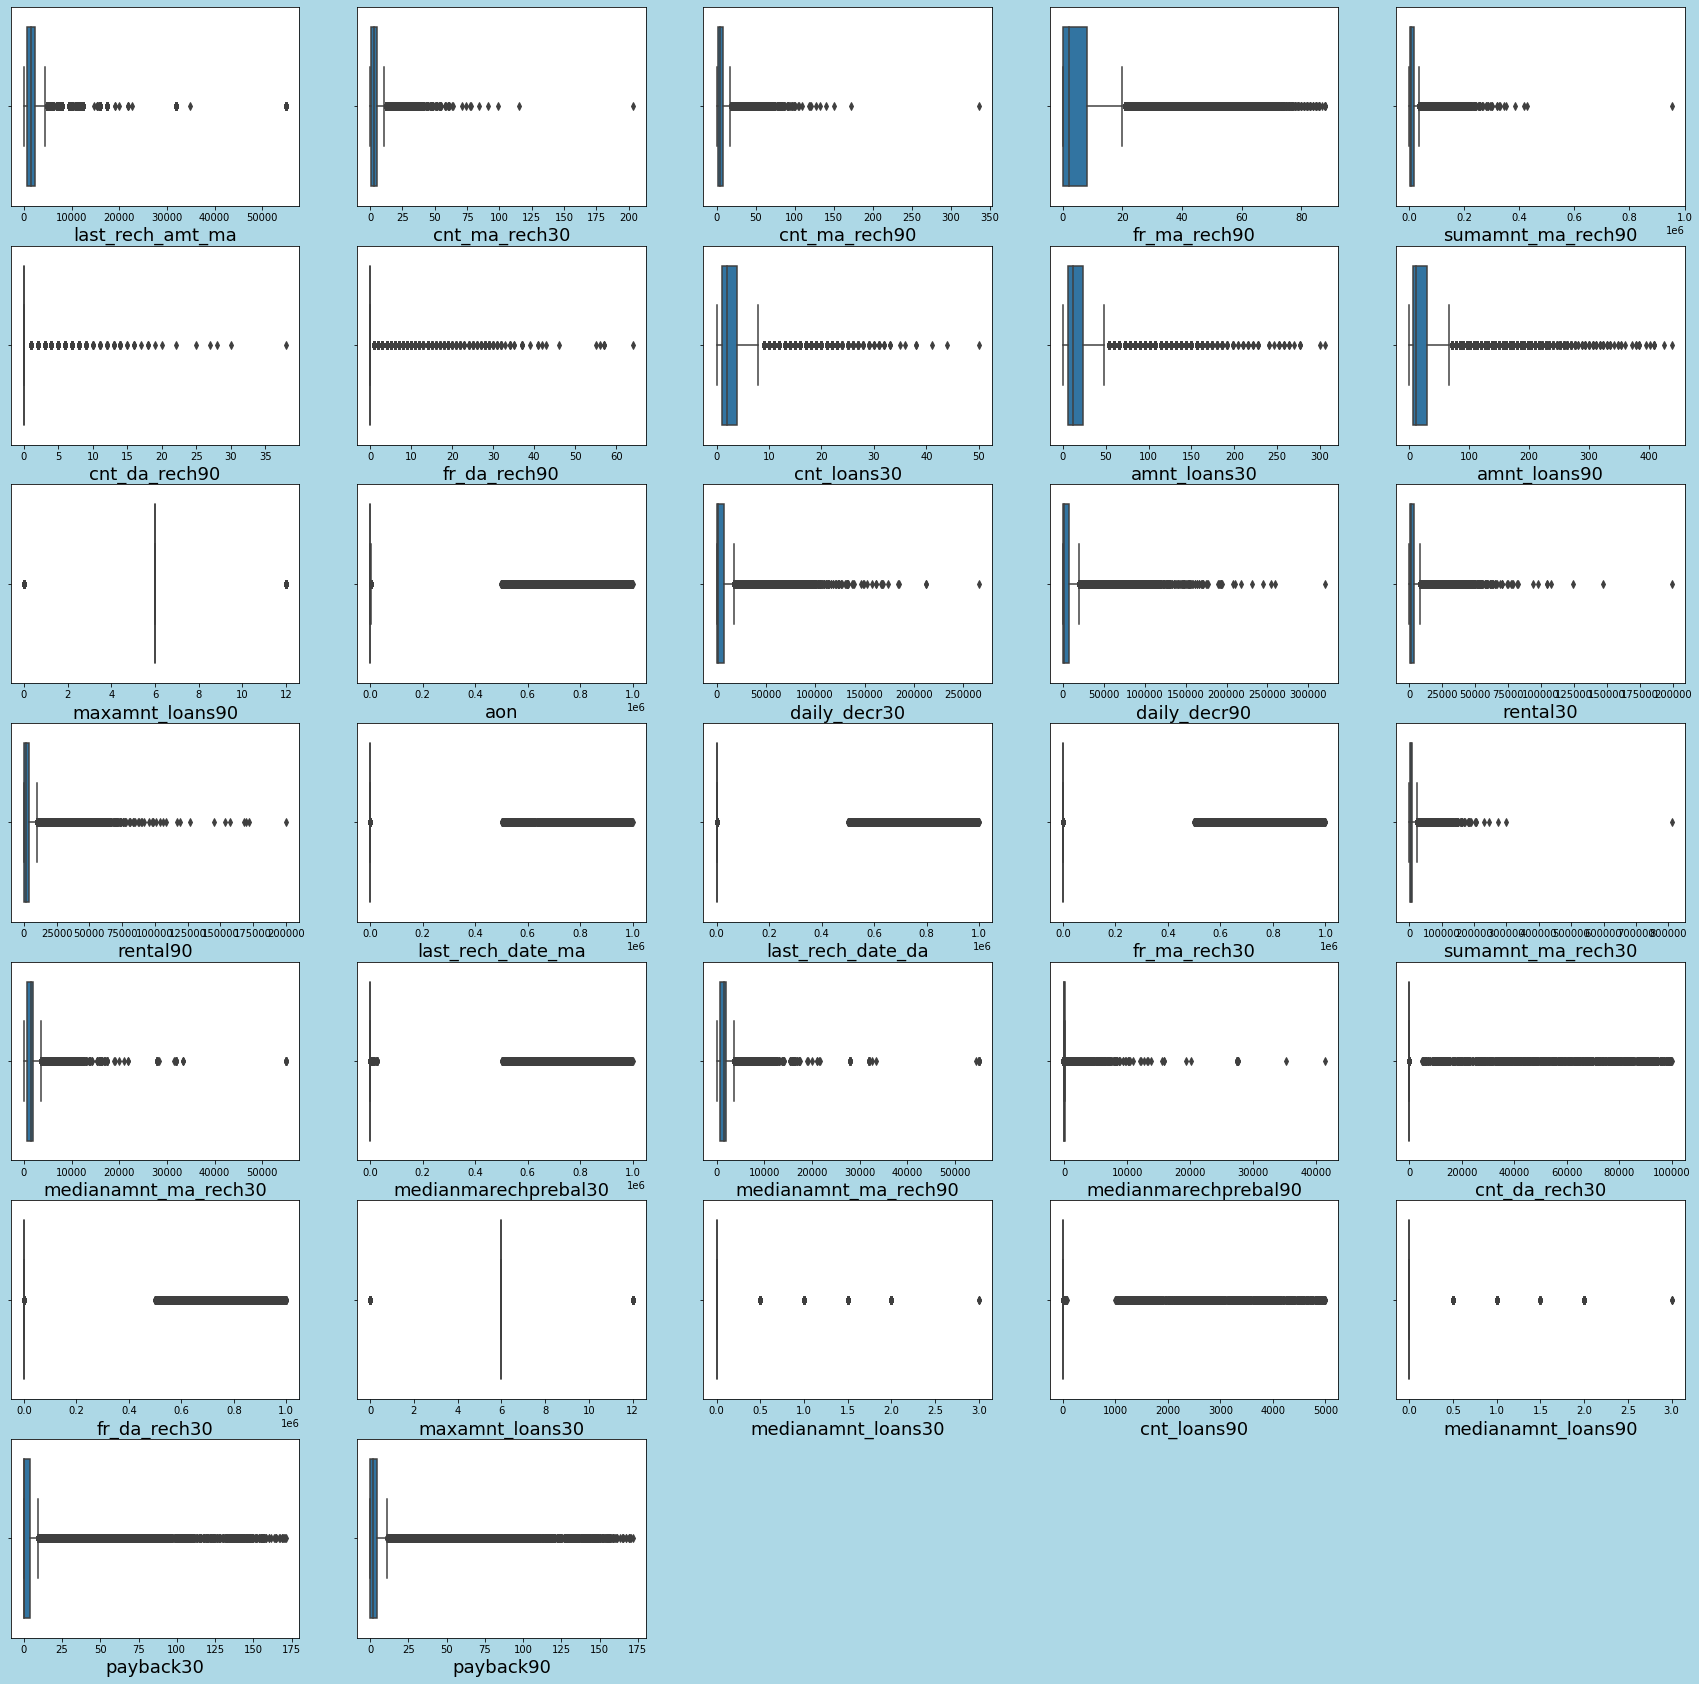

In [ ]:
plt.figure(figsize=(30,30),facecolor='lightblue')
plotnumber=1
for column in num:
    if plotnumber<=35:
        ax = plt.subplot(7,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.show()

**Lot of outliers present in the dataset, and hence we will use zscore method to remove the outliers**

In [ ]:
# Removing outliers using zscore and keeping threshold as 3 (3 std from mean : 99.7% of data included)

from scipy.stats import zscore

z_score = np.abs(zscore(df))

filtering_entry = (z_score < 3).all(axis = 1)

df_new = df[filtering_entry]

In [ ]:
Data_loss = (df.shape[0] - df_new.shape[0])/df.shape[0]*100
Data_loss

23.423492196781382

*Since the data is very important and we cannot bear such a huge loss of data and hence we will use IQR method to remove outliers*

In [ ]:
df1=df.copy()
Q1 = df1.quantile(0.25)
Q3= df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

label                       0.000000
aon                       736.000000
daily_decr30             7201.547000
daily_decr90             7760.096667
rental30                 3062.650000
rental90                 3874.510000
last_rech_date_ma           6.000000
last_rech_date_da           0.000000
last_rech_amt_ma         1539.000000
cnt_ma_rech30               4.000000
fr_ma_rech30                6.000000
sumamnt_ma_rech30        8470.000000
medianamnt_ma_rech30     1154.000000
medianmarechprebal30       72.000000
cnt_ma_rech90               6.000000
fr_ma_rech90                8.000000
sumamnt_ma_rech90       13683.000000
medianamnt_ma_rech90     1151.000000
medianmarechprebal90       64.710000
cnt_da_rech30               0.000000
fr_da_rech30                0.000000
cnt_da_rech90               0.000000
fr_da_rech90                0.000000
cnt_loans30                 3.000000
amnt_loans30               18.000000
maxamnt_loans30             0.000000
medianamnt_loans30          0.000000
c

In [ ]:
data = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(56664, 35)


In [ ]:
Data_loss = (df.shape[0] - data.shape[0])/df.shape[0]*100
Data_loss

72.96474596002729

*In this dataset, we will set the flooring at 0th percentile for lower bound and capping at 99th percentile for upper bound.
Upper bound set as 99th percentile as most of values in dataset are realistic but still there are few very extreme values No Outliers in lower bound so Lower bound is set as 0th percentile*

In [ ]:
df1=df.copy()
Q1 = df1.quantile(0)
Q3= df1.quantile(0.99)
IQR = Q3 - Q1
print(IQR)

label                       1.000000
aon                      2419.080000
daily_decr30            41730.440000
daily_decr90            49967.383600
rental30                19465.962000
rental90                26997.968000
last_rech_date_ma          57.000000
last_rech_date_da          56.000000
last_rech_amt_ma        10000.000000
cnt_ma_rech30              20.000000
fr_ma_rech30               26.000000
sumamnt_ma_rech30       46857.440000
medianamnt_ma_rech30    10000.000000
medianmarechprebal30     1531.540000
cnt_ma_rech90              33.000000
fr_ma_rech90               54.000000
sumamnt_ma_rech90       78717.240000
medianamnt_ma_rech90    10000.000000
medianmarechprebal90     1040.196400
cnt_da_rech30               1.000000
fr_da_rech30                0.000000
cnt_da_rech90               1.000000
fr_da_rech90                0.000000
cnt_loans30                12.000000
amnt_loans30               84.000000
maxamnt_loans30            12.000000
medianamnt_loans30          1.000000
c

In [ ]:
data = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(198175, 35)


In [ ]:
Data_loss = (df.shape[0] - data.shape[0])/df.shape[0]*100
Data_loss

5.44770102054935

**Skewness Reduction**

In [ ]:
# Considering skewness reduction through PowerTransformer

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [ ]:
# Seperating features and target variable for classification task

X = data.drop('label',axis=1)

y = data['label']

In [ ]:
# Applying Power transformer

X_new_pt = pt.fit_transform(X)

# Converting numpy array(X_new_pt) into Dataframe and reassigning the values

X = pd.DataFrame(X_new_pt,columns= X.columns)

# Checking Skewness

X.skew().sort_values(ascending=False)

cnt_da_rech30           9.681414
cnt_da_rech90           6.688841
last_rech_date_da       6.421032
medianamnt_loans90      3.782971
medianamnt_loans30      3.452258
medianmarechprebal90    1.464526
medianmarechprebal30    1.286926
maxamnt_loans30         0.427389
maxamnt_loans90         0.367233
payback30               0.296428
payback90               0.208659
fr_ma_rech90            0.143565
fr_ma_rech30            0.136361
cnt_loans90             0.097593
pmonth                  0.079280
last_rech_date_ma       0.041793
cnt_loans30             0.036998
amnt_loans30            0.002738
fr_da_rech30            0.000000
fr_da_rech90            0.000000
cnt_ma_rech30          -0.001234
cnt_ma_rech90          -0.003740
amnt_loans90           -0.008161
rental90               -0.044552
rental30               -0.044563
aon                    -0.056856
medianamnt_ma_rech90   -0.066139
last_rech_amt_ma       -0.083882
daily_decr90           -0.120818
daily_decr30           -0.130883
pday      

# **Correlation**

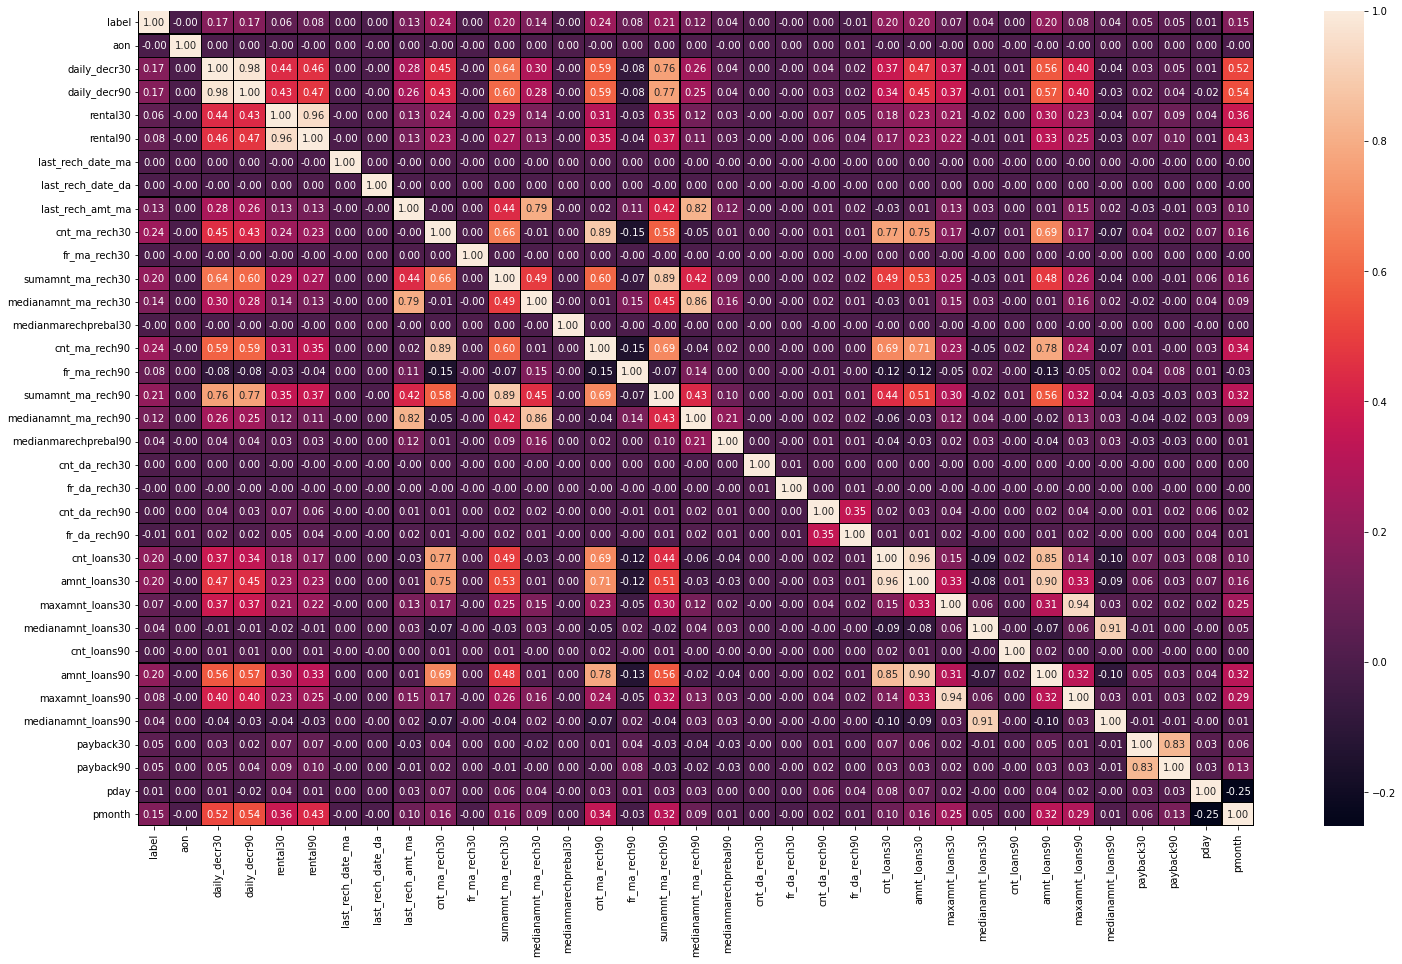

In [ ]:
# Plotting heatmap and checking correlation

plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot =True,linewidths=0.15,linecolor='black',fmt="0.2f")

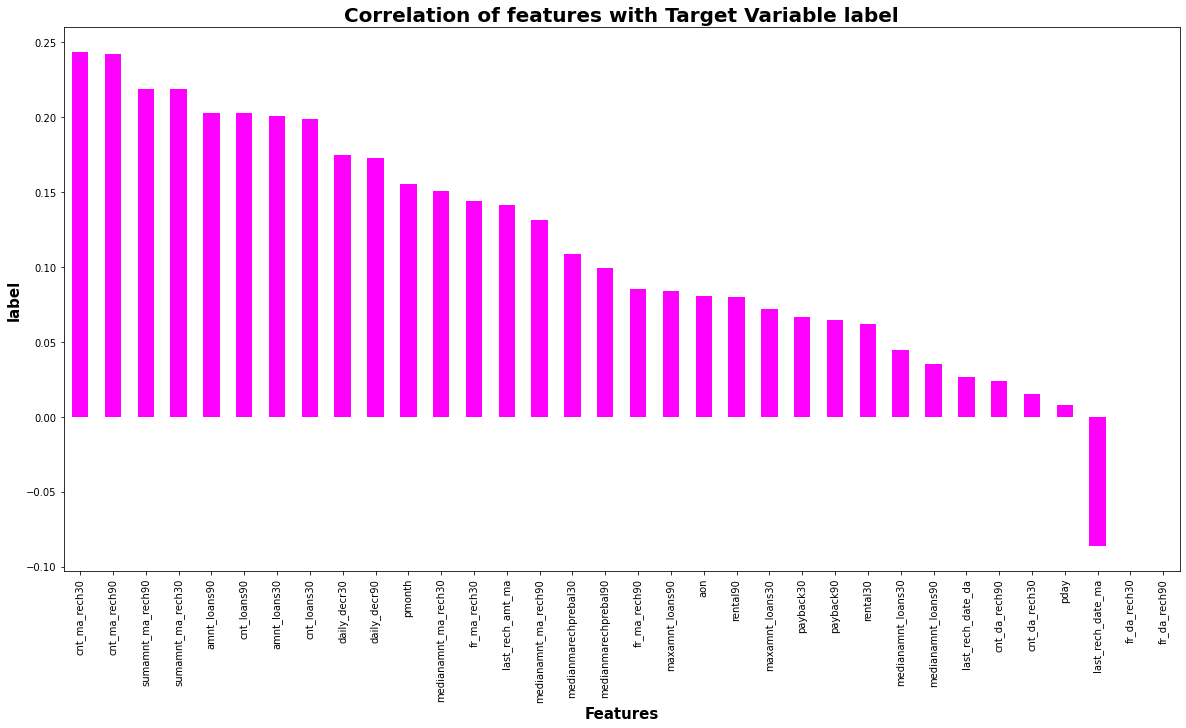

In [ ]:
plt.figure(figsize = (20,10))
data.corr()['label'].drop(['label']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('label',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable label',fontsize = 20,fontweight='bold')
plt.show()

# BALANCING TARGET VARIABLE USING SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
over_smp = SMOTE(0.8)

In [ ]:
print("The number of target classes before fit{}".format(Counter(y)))

The number of target classes before fitCounter({1: 173462, 0: 24713})


**Clearly visible the data is imbalanced**

In [ ]:
X,y = over_smp.fit_resample(X,y)
print("The number of target classes after fit{}".format(Counter(y)))

The number of target classes after fitCounter({1: 173462, 0: 138769})


# Standard Scaling using Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaler = scaler.fit_transform(X)

In [ ]:
# Checking multicollinearity in the dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaler,i) for i in range(X.shape[1])]
vif['Features'] = X.columns

vif

,vif,Features
0,1.047947,aon
1,644.191195,daily_decr30
2,707.032334,daily_decr90
3,42.018464,rental30
4,46.117698,rental90
5,2.743467,last_rech_date_ma
6,17.272265,last_rech_date_da
7,11.286203,last_rech_amt_ma
8,73.008393,cnt_ma_rech30
9,2.480985,fr_ma_rech30


* daily_decr30 and daily_decr90 are highly correlated with each other

* cnt_loans90 and amnt_loans90 are highly correlated with each other

* cnt_loans30 and amnt_loans30 are highly correlated with each other

* cnt_ma_rech30 and sumamnt_ma_rech30 are highly correlated with each other

* High multicollinearity exists in the dataset

* **Way to address Multicollinerity is to Scale Data and then apply PCA**


# **Principal Component Analysis(PCA)**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_scaler)

array([[ 1.81620442e+00, -6.15970790e-01, -2.67606744e-01, ...,
         3.57323781e-03, -6.13018202e-17, -5.39178898e-17],
       [ 1.90557073e+00,  2.48470984e+00, -1.71187254e-01, ...,
        -1.27856138e-02,  1.40055072e-16, -1.54140753e-16],
       [-1.13283576e+00,  1.54882933e+00, -1.60886245e-01, ...,
        -1.80970772e-02,  4.08960060e-18, -2.85616658e-17],
       ...,
       [-2.38947883e+00,  1.23133491e+00, -1.32452935e-01, ...,
        -3.12726281e-04,  2.56701587e-18, -8.32782559e-19],
       [-1.19963871e-01,  6.82870659e-01, -2.92113067e-01, ...,
         1.17192955e-01, -3.49234592e-18, -5.75417410e-18],
       [-3.63729171e+00,  6.13650128e-01, -2.08361784e-01, ...,
        -1.78578396e-02,  2.27059891e-18,  1.80798008e-18]])

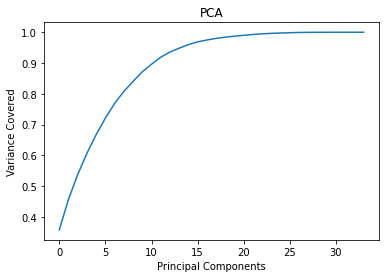

In [ ]:
# Lets plot scree plot to check the best components

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

**Around 13 components are able to explain more than 95% variance in the dataset and hence its safe to consider 13 PC's**

In [ ]:
pca = PCA(n_components=13)
new_pcomp = pca.fit_transform(X_scaler)
princ_comp = pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
princ_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,1.816204,-0.615971,-0.267607,-1.084234,-0.771625,-1.235938,0.208227,-1.020198,-2.268716,0.464777,1.523386,0.812294,1.352166
1,1.905571,2.484710,-0.171187,3.587108,0.857446,2.244833,-2.762230,-0.417684,0.443507,-0.665439,-0.056510,0.681180,1.067776
2,-1.132836,1.548829,-0.160886,1.661554,-0.519040,0.232766,0.145651,-0.008749,0.718595,-0.284196,0.987148,-0.421634,0.856240
3,-2.679962,-0.258448,-0.204293,-0.498226,-0.053914,0.469793,-0.943817,-0.871963,1.422109,-0.166237,0.152609,1.648212,-1.859436
4,3.582822,-1.225642,-0.462003,-2.577383,-0.329176,0.064347,-0.697698,0.910816,1.078825,-0.782981,-0.218619,-0.472673,-0.291357
...,...,...,...,...,...,...,...,...,...,...,...,...,...
312226,-2.766814,0.987978,-0.421097,-1.287725,-0.112273,0.575952,-1.284603,-0.230926,0.865312,0.292764,0.171533,-0.216132,0.712653
312227,2.721696,-2.406109,-0.268197,-2.540795,-0.145482,0.093193,0.068832,1.205784,0.654848,0.155214,0.401656,-0.473738,-0.463216
312228,-2.389479,1.231335,-0.132453,1.313256,-0.539468,-0.002197,-0.696277,-0.242992,0.962842,0.539324,2.116016,1.231443,-0.955352
312229,-0.119964,0.682871,-0.292113,-1.528871,0.015036,0.764212,0.445209,-0.499940,-0.666536,-1.541603,1.451165,0.977042,-0.369316


# **MODEL BUILDING - CLASSIFICATION TASK**

In [ ]:
# Importing required libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV

**Function for calculating Model Performance**

In [ ]:
# Defining function for calculating the performance of the classification model

def metric_score(clf,X_train,X_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(X_train)
        
        print("-----------------Train Result--------------------")
        
        print(f"Train Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train == False:
        
        pred = clf.predict(X_test)
        
        matrix = confusion_matrix(y_test,pred)
        
        print("-----------------Test Result--------------------")
        
        print("=====Confusion Matrix======= \n",matrix)
        
        print(f"Test Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%")
        
        print("\n Test Classification Report \n ", classification_report(y_test,pred,digits =2))

**Best Random State**

In [ ]:
from sklearn.model_selection import train_test_split
maxAccu = 0 # Max Accuracy
maxRS = 0   # Best random state for which maximum accuracy is achieved

for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(princ_comp,y,test_size=0.2,random_state=i)
  
    lr = LogisticRegression()
    
    lr.fit(X_train,y_train)    # Training the model
   
    pred_lr = lr.predict(X_test)    # Predicting the target variable
 
    acc_lr = accuracy_score(y_test,pred_lr)
  
    if acc_lr>maxAccu:
    
        maxAccu = acc_lr
        
        maxRS = i
        
print("Maximum Accuracy:",maxAccu,"at random state ", maxRS)

Maximum Accuracy: 0.7669063365734142 at random state  7


**Train test Split using best Random State**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(princ_comp,y,test_size=0.2,random_state=7)

**Model 1 : Logistic Regression**

In [ ]:
lr = LogisticRegression()

lr.fit(X_train,y_train)

pred_lr = lr.predict(X_test)    # Predicted values

metric_score(lr,X_train,X_test,y_train,y_test,train=True)

metric_score(lr,X_train,X_test,y_train,y_test,train=False)

cr_lr = cross_val_score(lr,princ_comp,y,cv=5)

print("Cross validation score of Logistic regression model :",cr_lr.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 76.25%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[19844  7911]
 [ 6645 28047]]
Test Accuracy Score : 76.69%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.75      0.71      0.73     27755
           1       0.78      0.81      0.79     34692

    accuracy                           0.77     62447
   macro avg       0.76      0.76      0.76     62447
weighted avg       0.77      0.77      0.77     62447

Cross validation score of Logistic regression model : 76.33835287923557


**Tuning Parameters for Logistic Regression**

In [ ]:
lr_params = {'penalty':['l1', 'l2'],
             'tol':[0.0001,0.001,0.01],
             'solver':['newton-cg', 'lbfgs', 'liblinear'],
             'multi_class':['auto', 'ovr', 'multinomial']}

grd_lr = GridSearchCV(lr,param_grid = lr_params, n_jobs =-1)

grd_lr.fit(X_train,y_train)

print("Best parameters : ",grd_lr.best_params_)

Best parameters :  {'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}


In [ ]:
lr = grd_lr.best_estimator_

lr.fit(X_train,y_train)

pred_lr = lr.predict(X_test)    # Predicted values

metric_score(lr,X_train,X_test,y_train,y_test,train=True)

metric_score(lr,X_train,X_test,y_train,y_test,train=False)

cr_lr = cross_val_score(lr,princ_comp,y,cv=5)

print("Cross validation score of Logistic regression model :",cr_lr.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 76.10%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[19958  7797]
 [ 6664 28028]]
Test Accuracy Score : 76.84%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.75      0.72      0.73     27755
           1       0.78      0.81      0.79     34692

    accuracy                           0.77     62447
   macro avg       0.77      0.76      0.76     62447
weighted avg       0.77      0.77      0.77     62447

Cross validation score of Logistic regression model : 76.23490337075161


**Model 2 : KNN Classifier**

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

pred_knn = knn.predict(X_test)    # Predicted values

metric_score(knn,X_train,X_test,y_train,y_test,train=True)

metric_score(knn,X_train,X_test,y_train,y_test,train=False)

cr_knn = cross_val_score(knn,princ_comp,y,cv=5)

print("Cross validation score of K Neighbors Classifier model :",cr_knn.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 92.72%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[27208   547]
 [ 5746 28946]]
Test Accuracy Score : 89.92%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.83      0.98      0.90     27755
           1       0.98      0.83      0.90     34692

    accuracy                           0.90     62447
   macro avg       0.90      0.91      0.90     62447
weighted avg       0.91      0.90      0.90     62447

Cross validation score of K Neighbors Classifier model : 89.89594383929192


*Better results can be seen for KNN Classifier model when compared to Logistic Regression* 

**Model 3 : Decision Tree Classifier**

In [ ]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)      # Model training

pred_dt = dt.predict(X_test)    # Predicted values

metric_score(dt,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(dt,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_dt = cross_val_score(dt,princ_comp,y,cv=5)

print("Cross validation score of Decision Tree Classifier model :",cr_dt.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 100.00%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[24174  3581]
 [ 4780 29912]]
Test Accuracy Score : 86.61%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.83      0.87      0.85     27755
           1       0.89      0.86      0.88     34692

    accuracy                           0.87     62447
   macro avg       0.86      0.87      0.86     62447
weighted avg       0.87      0.87      0.87     62447

Cross validation score of Decision Tree Classifier model : 86.88567139857574


**Tuning Parameters for Decision Tree**

In [ ]:
grid_param = {'criterion':['gini','entropy'],
              'max_depth': range(9,15),
              'min_samples_leaf': range(3,7),
              'min_samples_split': range(2,6)
             }

grid_search = GridSearchCV(estimator = dt, param_grid = grid_param,n_jobs =-1)

grid_search.fit(X_train,y_train)

print("Best parameters : ",grid_search.best_params_)

Best parameters :  {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [ ]:
dt = grid_search.best_estimator_

dt.fit(X_train,y_train)      # Model training

pred_dt = dt.predict(X_test)    # Predicted values

metric_score(dt,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(dt,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_dt = cross_val_score(dt,princ_comp,y,cv=5)

print("Cross validation score of Decision Tree Classifier model :",cr_dt.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 87.25%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[23912  3843]
 [ 6221 28471]]
Test Accuracy Score : 83.88%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.79      0.86      0.83     27755
           1       0.88      0.82      0.85     34692

    accuracy                           0.84     62447
   macro avg       0.84      0.84      0.84     62447
weighted avg       0.84      0.84      0.84     62447

Cross validation score of Decision Tree Classifier model : 83.56633627827368


**Model 4 : Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)      # Model training

pred_rf = rf.predict(X_test)    # Predicted values

metric_score(rf,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(rf,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_rf = cross_val_score(rf,princ_comp,y,cv=5)

print("Cross validation score of Random Forest Classifier model :",cr_rf.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 100.00%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[25782  1973]
 [ 2468 32224]]
Test Accuracy Score : 92.89%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.91      0.93      0.92     27755
           1       0.94      0.93      0.94     34692

    accuracy                           0.93     62447
   macro avg       0.93      0.93      0.93     62447
weighted avg       0.93      0.93      0.93     62447

Cross validation score of Random Forest Classifier model : 93.06635280344867


In [ ]:
params_rf = {'criterion':['gini','entropy'],
         'max_depth': [10,25],
         'min_samples_split' :[2,3],
         'min_samples_leaf' :[2,3]}

grd_rf = GridSearchCV(rf,param_grid = params_rf,n_jobs =-1)

grd_rf.fit(X_train,y_train)

print("Best parameters : ",grd_rf.best_params_)

Best parameters :  {'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [ ]:
rf = grd_rf.best_estimator_

rf.fit(X_train,y_train)

pred_rf = rf.predict(X_test)    # Predicted values

metric_score(rf,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(rf,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_rf = cross_val_score(rf,princ_comp,y,cv=5)

print("Cross validation score of Random Forest Classifier model :",cr_rf.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 98.87%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[25559  2196]
 [ 2749 31943]]
Test Accuracy Score : 92.08%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.90      0.92      0.91     27755
           1       0.94      0.92      0.93     34692

    accuracy                           0.92     62447
   macro avg       0.92      0.92      0.92     62447
weighted avg       0.92      0.92      0.92     62447

Cross validation score of Random Forest Classifier model : 92.2073743919977


**Model 5 : Support Vector Classifier**

In [ ]:
svc = SVC()

svc.fit(X_train,y_train)

pred_svc = svc.predict(X_test)    # Predicted values

metric_score(svc,X_train,X_test,y_train,y_test,train=True)

metric_score(svc,X_train,X_test,y_train,y_test,train=False)

cr_svc = cross_val_score(svc,princ_comp,y,cv=5)

print("Cross validation score of Support Vector Classifier model :",cr_svc.mean()*100)


-----------------Train Result--------------------
Train Accuracy Score : 84.00%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[22973  4699]
 [ 5307 29468]]
Test Accuracy Score : 83.98%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.81      0.83      0.82     27672
           1       0.86      0.85      0.85     34775

    accuracy                           0.84     62447
   macro avg       0.84      0.84      0.84     62447
weighted avg       0.84      0.84      0.84     62447



**Tuning Parameters for SVC**

In [ ]:
svc_params = {'kernel':['rbf','linear','poly','sigmoid'],
              'gamma':['scale','auto'],
              'decision_function_shape':['ovr','ovo']
              }

grd_svc = GridSearchCV(svc,param_grid = svc_params,n_jobs =-1)

grd_svc.fit(X_train,y_train)

print("Best parameters : ",grd_svc.best_params_) 

# **Plotting ROC AUC Curve**

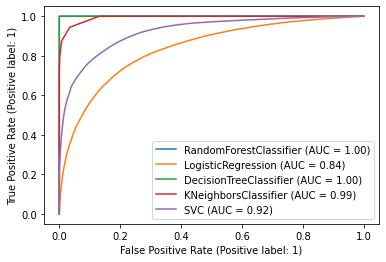

In [ ]:
# Plotting ROC AUC curve on training data
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
lr.fit(X_train,y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
svc.fit(X_train,y_train)
disp = plot_roc_curve(rf,X_train,y_train)

plot_roc_curve(lr,X_train,y_train,ax=disp.ax_)

plot_roc_curve(dt,X_train,y_train,ax=disp.ax_)

plot_roc_curve(knn,X_train,y_train,ax=disp.ax_)

plot_roc_curve(svc,X_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

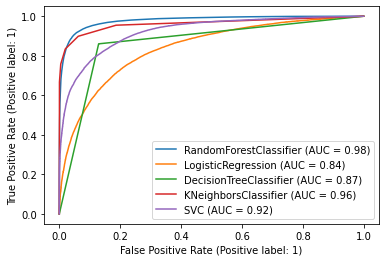

In [ ]:
# Plotting ROC AUC curve on test data

disp = plot_roc_curve(rf,X_test,y_test)

plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)

plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)

plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

**Out of all the models, Random forest fits best for the given dataset as per ROC AUC curve**

# **Saving the Model**

In [ ]:
filename = 'microcredit_defaulter_clf.pkl'
pickle.dump(rf,open(filename,'wb'))

In [ ]:
loaded_model = pickle.load(open('microcredit_defaulter_clf.pkl','rb'))

pred_rf = loaded_model.predict(X_test)

result = accuracy_score(y_test,pred_rf)

print(result*100)

92.92520057008343


In [ ]:
conclusion = pd.DataFrame([pred_rf,y_test],index=['Predicted','Original'])

conclusion

,0,1,2,3,4,5,6,7,8,9,...,62437,62438,62439,62440,62441,62442,62443,62444,62445,62446
Predicted,0,1,0,1,1,0,0,0,1,0,...,1,1,1,1,1,0,0,1,1,0
Original,0,0,0,1,1,0,1,0,1,0,...,1,1,1,0,1,0,0,1,1,0
